dtype('int64')

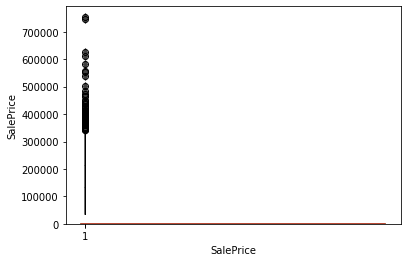

In [5]:
import pandas as pd  #data manipulation library 
import matplotlib.pyplot as plt #data visualisation library
import seaborn as sns #data visualisation library - best for visualisation

house_price_df=pd.read_csv('1_housepriceCSV.csv')
house_price_df
house_price_df.shape #gives count of (rows,columns )
house_price_df.columns # gives column names. Every column is a series in pandas.
house_price_df[['OverallCond','MSSubClass']] #when to show more than one column
plt.hist(house_price_df['SalePrice'],bins=100) #to plot histogram with bins
plt.hist(house_price_df['SalePrice'])  #to plot histogram without bins
sns.distplot(house_price_df['SalePrice'],bins=1000)#to plot distplot with bins
sns.distplot(house_price_df['SalePrice'])          #to plot distplot without bins
sns.boxplot(house_price_df['SalePrice'],orient='v')#boxplot with seaborn
#plt.boxplot(house_price_df['SalePrice'],orient='v')Not wokoing 
plt.boxplot(house_price_df['SalePrice']) #boxplot with matplotlib
house_price_df['SalePrice'].describe()   #all details of mean,median ,mode etc
house_price_df.dtypes                    #data types of columns
house_price_df['SalePrice'].dtypes       #data types of particular column


# house_price_df['BsmtHalfBath'].dtypes 

In [4]:
#Assignement: to print column names which have int and float 

new_list_columns_int_float=[i for i in house_price_df.columns if house_price_df[i].dtype == 'int64' 
                                                              or house_price_df[i].dtype=='float64']
new_list_columns_int_float


#Creating a new data frame and adding the columns having int and float 
new_list_object=[i for i in house_price_df.columns if house_price_df[i].dtype == 'object']
new_list_object




['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [6]:
#To find missing values
house_price_df.isnull().sum()
#house_price_df['Alley'].isnull().sum()


missing_values_dataFrame = pd.DataFrame({'Column_Name': house_price_df.columns,
                                         'Missing_value_count':house_price_df.isnull().sum(),
                                         'Missing_value_perecentage':house_price_df.isnull().sum()/house_price_df.shape[0]*100
                                        })
missing_values_dataFrame=missing_values_dataFrame.sort_values(by='Missing_value_perecentage',ascending = False)

cols_to_drop=list(missing_values_dataFrame[missing_values_dataFrame['Missing_value_perecentage']>50]['Column_Name'])
cols_to_drop

#missing_values_dataFrame['Missing_value_perecentage']>50   (gives true or false for each column)
#missing_values_dataFrame[missing_values_dataFrame['Missing_value_perecentage']>50]['Column_Name']  (gives column name which are having missing value names greater than 50)
#list(missing_values_dataFrame[missing_values_dataFrame['Missing_value_perecentage']>50]['Column_Name']) (coverts into list)
#house_price_df.drop(columns=['PoolQC'],inplace=True,axis=1)

house_price_df.drop(columns=cols_to_drop,inplace=True)
#house_price_df.columns
house_price_df.shape
house_price_df

new_list_object=[i for i in house_price_df.columns if house_price_df[i].dtype == 'object']
new_list_object

new_list_columns_int_float=[i for i in house_price_df.columns if house_price_df[i].dtype == 'int64' 
                                                              or house_price_df[i].dtype=='float64']
new_list_columns_int_float


for i in new_list_columns_int_float:
    house_price_df[i].fillna(house_price_df[i].mean(),inplace=True)
    
for i in new_list_object:
    house_price_df[i].fillna(house_price_df[i].mode()[0],inplace=True)

house_price_df.isnull().sum()




['PoolQC', 'MiscFeature', 'Alley', 'Fence']

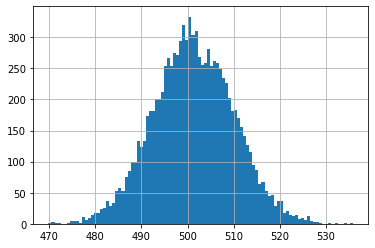

In [16]:
#central limit theorem

import pandas as pd
import numpy as np
import random

np.random.seed(26)#to generate same values for different iterations
population = pd.DataFrame()

#create a column called values that is having 10000 random numbers drawn from uniform distribution and al will be b/w(0,1000)
population['values'] = np.random.uniform(0,1000,size=10000)
population['values']

sampled_means=[]

#for 10000 times
for i in range(0,10000):
    sampled_means.append(population['values'].sample(n=1000).mean()) #selecting 1000 samples and geting means for them.
    
#plt.hist(sampled_means,bins=100) #to plot histogram with bins
pd.Series(sampled_means).hist(bins=100)



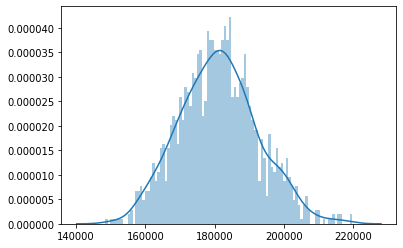

In [10]:
#Central limit theorem for house_price data with population as [Sales_price]
house_price_poulation=house_price_df['SalePrice']

house_price_means=[]

#for 1460 times - because population for house_price_df['SalePrice'] is 1460
for i in house_price_poulation :
    house_price_means.append(house_price_poulation.sample(n=50).mean()) 
    #selecting 800 random samples and geting mean for them for 1460 times.
    
#plt.hist(house_price_means,bins=100)
sns.distplot(house_price_means,bins=100)#to plot distplot with bins

#pd.Series(house_price_means).hist(bins=80)


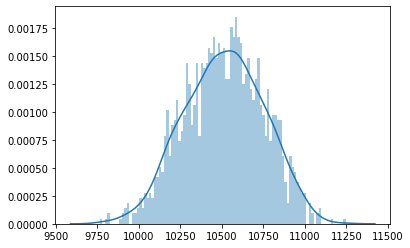

In [5]:
lot_area_population=house_price_df['LotArea']
means=[]

for i in lot_area_population:
        means.append(lot_area_population.sample(n=800).mean()) 

#plt.hist(house_price_means,bins=100)
sns.distplot(means,bins=100)#to plot distplot with bins

#pd.Series(means).hist(bins=100)   

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
        ... 
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1460, dtype: object